# Convolutional Neural Network (CNN)

## 0. Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
%matplotlib inline

print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


## 1. Download and prepare the CIFAR10 dataset

In [2]:
# Downloading data from https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
# rename it as cifar-10-batches-py.tar.gz
# copy it to ～./keras/datasets/
  
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## 2. Verify the data

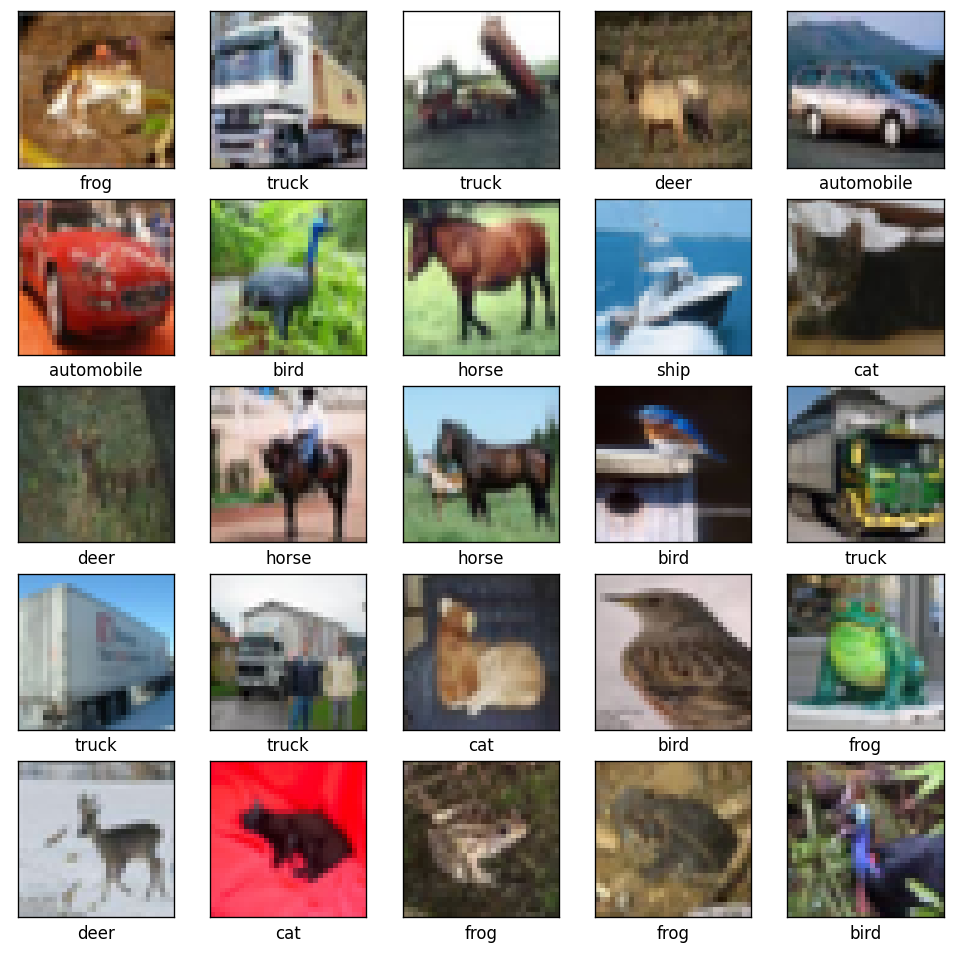

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10), dpi=120)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## 3. Create the convolutional base

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


## 4. Add Dense layers on top

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

## 5. Compile and train the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.7575 - accuracy: 0.3492 - val_loss: 1.2928 - val_accuracy: 0.5356
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2128 - accuracy: 0.5652 - val_loss: 1.0732 - val_accuracy: 0.6170
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0377 - accuracy: 0.6313 - val_loss: 0.9879 - val_accuracy: 0.6535
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9178 - accuracy: 0.6773 - val_loss: 0.9470 - val_accuracy: 0.6693
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8382 - accuracy: 0.7087 - val_loss: 0.9070 - val_accuracy: 0.6878
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7755 - accuracy: 0.7299 - val_loss: 0.9701 - val_accuracy: 0.6661
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7327 - accuracy: 0.7414 - val_loss: 0.8938 - val_accuracy

## 6. Evaluate the model

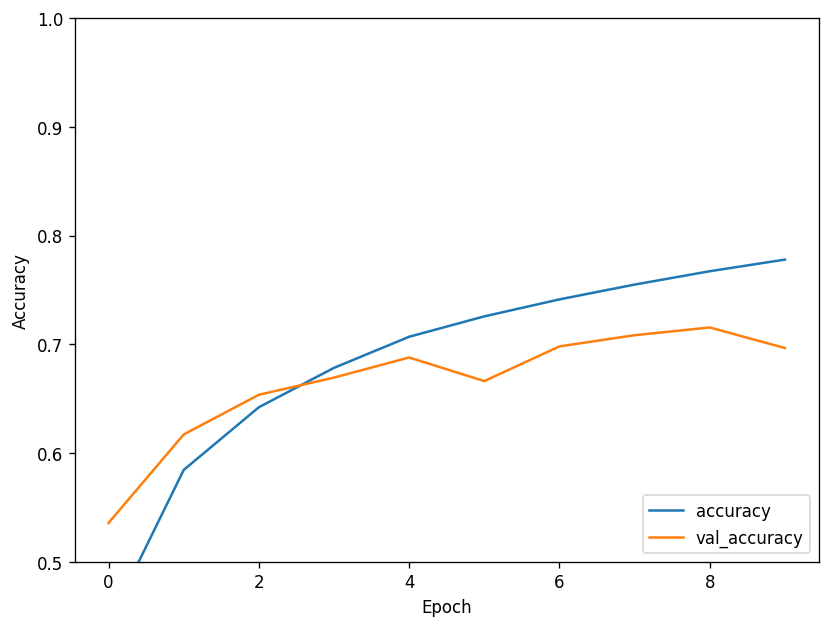

In [11]:
plt.figure(figsize=(8,6), dpi=120)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [12]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.9437 - accuracy: 0.6965


In [13]:
print(test_acc)

0.6965000033378601


In [14]:
print(test_loss)

0.9437462687492371


# reference

### https://tensorflow.google.cn/tutorials/images/cnn#evaluate_the_model